<a href="https://colab.research.google.com/github/othoni-hub/NSI/blob/main/M1_MEEF_NSI_TP_Complexit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UCO Professeurs Stagiaires NSI**

**TP n°1 - Correction : Différencier autour de la complexité**

**Olivier THÖNI** - UCO-IFUCOME (groupes "Mathématiques" et "NSI")

document sous licence "Creative Commons" : By - NC - SA



---



Il s'agit de concevoir une séance de Terminale spé-NSI sur le thème de la **complexité**, présentant des éléments de différenciation.

<img src="https://www.industrie-techno.com/mediatheque/6/0/0/000043006_600x400_c.png" width="300" height="200" />

Le thème de la **complexité** est éparpillé dans de 
nombreux paragraphes de la partie "**Algorithmique**"des programmes officiels de la spécialité NSI de Première et de Terminale :

* [programme de Première](https://cache.media.eduscol.education.fr/file/SP1-MEN-22-1-2019/26/8/spe633_annexe_1063268.pdf) 

* [programme de Terminale](https://cache.media.eduscol.education.fr/file/SPE8_MENJ_25_7_2019/93/3/spe247_annexe_1158933.pdf)

Ici, nous revenons sur des algorithmes potentiellement déjà rencontrés, dans lesquels nous placerons des "instruments de mesure" et de représentation graphique de l'efficacité temporelle, selon la taille des données d'entrée.

Puis, nous évoquerons la notion d'**ordre de grandeur** de cette complexité, en comparant les différents ordres, en donnant des astuces de calcul, et une méthodologie de détermination dans les algorithmes.



---



Télécharger et compléter le présent NoteBook ici :https://frama.link/OT-Complexite 




**PARTIE I**

Il existe des dalles, fabriquées dans un matériau quasi-impossible à découper. 

On dispose d'un certain nombre de dalles de 1m x 1m, on cherche à déterminer les dimensions de toutes les surfaces rectangulaires que l'on peut recouvrir avec la totalité de ces dalles.



<img src="https://www.carrelagesmoinscher.fr/catalog/images/collections/AMB-Materia-taupe.jpg" width="400" height="220" />



1.   Indiquer les dimensions de toutes les surfaces rectangulaires possibles pour les nombres N de dalles suivants :
*   N = 100 
*   N = 360 
*   N = 1001 
*   N = 1200 
*   N = 1681 
*   N = 19600 
*   N = 50000
*   N = 531441 
*   N = 3628800


On utilisera trois algorithmes, commencer par tester brutalement tous les entiers jusqu'à N, puis chercher à améliorer le nombre de passage dans la boucle, puis l'améliorer encore en observant le cas suivant : tracer à la main les rectangles correspondant à la situation où l'on dispose de 36 dalles... Une idée ?





---









2.  **Évaluation du temps de calcul** 

<img src="https://ak.picdn.net/shutterstock/videos/32278330/thumb/1.jpg" width="400" height="220" />

* Compter le nombre de divisions dans chaque algorithme
* Faire afficher les réponses possibles au fur et à mesure de leur apparition et mettre un compteur du nombre de ces affichages.

Lequel de ces deux moyens vous semble-t-il le plus pertinent pour mesurer le temps d'exécution du programme ?
Retirer l'autre et ajouter un "timer". 

***Défi 1 :***
*Stocker les résultats N / temps d'exécution dans un fichier csv*


---



In [ ]:
def diviseurs1(N) :
    c = 0
    nb_diviseurs = 0

    for k in range(1,N+1) :
        c = c+1
        if N % k == 0 :
            #print(k ,'x',N//k)
            nb_diviseurs = nb_diviseurs + 1
    
    return nb_diviseurs, c 

In [ ]:
N = 16
nb_diviseurs, c = diviseurs1(N)
print(N, " possède :", nb_diviseurs, " diviseurs")

16  possède : 10  diviseurs


On remarque que la 2<sup>ème</sup> moitié de la liste est redondante, on se dit alors qu'on peut arrêter à la moitié...

In [ ]:
def diviseurs2(N) :
    c = 0
    nb_diviseurs = 0

    for k in range(1,N//2) :
        c = c + 1
        if N % k == 0 :
            #print(k ,'x',N//k)
            nb_diviseurs = nb_diviseurs + 2
             
    if k*k == N :
        nb_diviseurs = nb_diviseurs - 1
    return nb_diviseurs, c  

In [ ]:
N = 126
nb_diviseurs, c = diviseurs2(N)
print(N, " possède :", nb_diviseurs, " diviseurs")

126  possède : 20  diviseurs


Mais on peut encore faire mieux : si on a un "nombre carré", c'est-à-dire que, parmi les dispositions possibles, l'une est en carré), par exemple 36, une fois qu'on aura atteint le découpage 6x6, on repartira dans l'autre sens, en échangeant les largeurs et les longueurs que l'on a obtenues avant.

Ainsi, on optimise l'algorithme en s'arrêtant à la "racine carré" (notion vue en 4<sup>ème</sup>) du nombre de dalles (même si ce n'est pas un entier, ce nombre existe, il suffit alors de s'arrêter à l'entier juste avant)

In [ ]:
from math import sqrt

def diviseurs3(N) :
    print('Surface possibles avec ',N,' dalles : ')
    c = 0
    nb_diviseurs = 0
    for k in range(1,int(sqrt(N)+1)) :
        c = c + 1
        if N % k == 0 :
            print(k ,'x',N//k)
            nb_diviseurs = nb_diviseurs + 2
    if k*k == N :
        nb_diviseurs = nb_diviseurs - 1
    return nb_diviseurs, c 

In [ ]:
N = 36
nb_diviseurs, c = diviseurs3(N)
print(N, " possède :", nb_diviseurs, " diviseurs")

Surface possibles avec  36  dalles : 
1 x 36
2 x 18
3 x 12
4 x 9
6 x 6
36  possède : 9  diviseurs


In [ ]:
N = 1401
nb_diviseurs, c = diviseurs3(N)
print(N, " possède :", nb_diviseurs, " diviseurs")

Surface possibles avec  1401  dalles : 
1 x 1401
3 x 467
1401  possède : 4  diviseurs


**Pertinence de nos compteurs :**

Le compteur de "print()" n'est pas pertinent, car il n'est incrémenté que lorsque l'on a rencontré un diviseur.

Or, le nombre de diviseurs de N n'est pas lié à la taille de N : 36 a 9 diviseurs, tandis que 1401 n'en a que 4.

Il suffit donc de récupérer le nombre de passages dans la boucle (inutile même de mettre un compteur...)

3. **Graphiques**

Effectuer des relevés des nombres de divisions selon les valeurs de N, et tracer les graphiques...


*   à la main
*   avec Python
*   dans le tableur (Calc ou GeoGebra)

Dans le tableur, faire établir diverses courbes de tendance, pour déterminer laquelle s'adapte le mieux à vos relevés.


<img src="https://edu.ge.ch/site/utilisation-logiciel/wp-content/uploads/sites/51/2019/01/Graphxystep8.jpg" width="200" height="300" />


---


In [ ]:
liste_N = [100,360,1001,1200,1681,19600,50000, 531441, 3628800]


In [ ]:
liste_temps1 = []
for N in liste_N :
    nb_diviseurs,c = diviseurs1(N)
    liste_temps1.append(c)

liste_temps1

[100, 360, 1001, 1200, 1681, 19600, 50000, 531441, 3628800]

In [ ]:
liste_temps2 = []
for N in liste_N :
    nb_diviseurs,c = diviseurs2(N)
    liste_temps2.append(c)

liste_temps2

[49, 179, 499, 599, 839, 9799, 24999, 265719, 1814399]

In [ ]:
liste_temps3 = []
for N in liste_N :
    nb_diviseurs,c = diviseurs3(N)
    liste_temps3.append(c)

liste_temps3

Surface possibles avec  100  dalles : 
1 x 100
2 x 50
4 x 25
5 x 20
10 x 10
Surface possibles avec  360  dalles : 
1 x 360
2 x 180
3 x 120
4 x 90
5 x 72
6 x 60
8 x 45
9 x 40
10 x 36
12 x 30
15 x 24
18 x 20
Surface possibles avec  1001  dalles : 
1 x 1001
7 x 143
11 x 91
13 x 77
Surface possibles avec  1200  dalles : 
1 x 1200
2 x 600
3 x 400
4 x 300
5 x 240
6 x 200
8 x 150
10 x 120
12 x 100
15 x 80
16 x 75
20 x 60
24 x 50
25 x 48
30 x 40
Surface possibles avec  1681  dalles : 
1 x 1681
41 x 41
Surface possibles avec  19600  dalles : 
1 x 19600
2 x 9800
4 x 4900
5 x 3920
7 x 2800
8 x 2450
10 x 1960
14 x 1400
16 x 1225
20 x 980
25 x 784
28 x 700
35 x 560
40 x 490
49 x 400
50 x 392
56 x 350
70 x 280
80 x 245
98 x 200
100 x 196
112 x 175
140 x 140
Surface possibles avec  50000  dalles : 
1 x 50000
2 x 25000
4 x 12500
5 x 10000
8 x 6250
10 x 5000
16 x 3125
20 x 2500
25 x 2000
40 x 1250
50 x 1000
80 x 625
100 x 500
125 x 400
200 x 250
Surface possibles avec  531441  dalles : 
1 x 531441
3 x 

[10, 18, 31, 34, 41, 140, 223, 729, 1904]

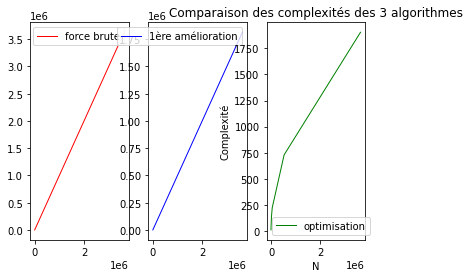

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
p1 = plt.plot (liste_N,liste_temps1,'r',linewidth = 1, label='force brute')
plt.legend()

plt.subplot(1,3,2)
p2 = plt.plot (liste_N,liste_temps2,'b',linewidth = 1, label='1ère amélioration') 
plt.legend()

plt.subplot(1,3,3)
p3 = plt.plot (liste_N,liste_temps3,'g',linewidth = 1, label='optimisation')
plt.legend()

plt.title('Comparaison des complexités des 3 algorithmes')
plt.xlabel('N')
#plt.xticks(rotation = '90')

plt.ylabel('Complexité')

plt.legend()
plt.show()

Là où les deux premières méthodes donnent sensiblement les mêmes résultats (la moitié, ça ne compte pas...), la 3<sup>ème</sup> semble "négligeable" (c'est le terme scientifique adapté).

En l'occurrence, Python n'est tout de même pas l'outil la plus adpaté pour ces visualisations graphies, car sans avis préconçu sur la tailles des résultats, on n'est pas en mesure d'ajuster les échelles des axes.

Nous allons récupérer nos données, pour les traiter dans un tableur, plus adapté, et capable de nous donner l'équation mathématique d'une courbe représentant convenablement nos résultats.


---



**Création et téléchargement d'un fichier csv pour génération des courbes de tendance dans un tableur**


In [ ]:
import csv

with open('SauvegardeTable1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(liste_N)
    writer.writerow(liste_temps1)
    writer.writerow(liste_temps2)
    writer.writerow(liste_temps3)

from google.colab import files
files.download("SauvegardeTable1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Une fois ouvert dans le tableur (Calc ou Excel ou Geogebra), on génère un graphique en "nuage de points" et on demande une "courbe de tendance", ici polynomiale... (on teste les diverses options, et on voit ce qui va le mieux...)

S'agissant d'un processus itératif qui détermine l'équation de la courbe de tendance, on n'obtient pas exactement $\sqrt N$

![...](https://drive.google.com/uc?id=1D9weqYicjRkwYEDP1AMHiJM91l04knC9)

Voir aussi dans Google Sheet : [>>ici<<](https://docs.google.com/spreadsheets/d/1TBMKjQA6u75ZJliFxiPHUtu2Y8DrlWLfiSdTZgxBcwo/edit?usp=sharing)

***mode opératoire : Ajouter une courbe de tendance***

*Sur votre ordinateur, ouvrez une feuille de calcul dans Google Sheets.
Double-cliquez sur un graphique.
À droite, cliquez sur Personnaliser. ...
À côté de "Appliquer à", choisissez la série de données à laquelle vous souhaitez ajouter une courbe de tendance.
Cliquez sur Courbe de tendance.*

**Partie II**

1. **Le juste prix**

<img src="https://upload.wikimedia.org/wikipedia/fr/b/b9/Logo_Juste_Prix_1998-2001.png" width="150" height="120" />

Un joueur doit deviner un prix entier compris entre 1 et un entier N : il avance un prix, l'animateur lui annonce si c'est plus ou moins, et on recommence.

On cherche à connaître le nombre de coups maximums, selon ce N, si le joueur adopte la bonne stratégie ?

Implémenter l'algorithme du joueur, faire les tests sur des prix demandant le nombre de coups maximums pour un N fixé, et compter le nombre de coups nécessaires, dans les cas suivants :

*   N = 64
*   N = 500
*   N = 1024
*   N = 1 048 576
*   N = 1 073 741 824



---




Dans tous les cas, lorsque le Juste Prix à trouver est 1, le chemin pour y arriver fait partie de ceux qui réalisent le maximum du nombre de coups (le pire des cas).

À noter qu'ici, à part N=500, tous les nombres proposés sont des puissances de deux.

In [ ]:
def trouve(NombreATrouver):
    c = 1
    proposition = int(input(' Nombre proposé :'))
    while proposition != NombreATrouver :
        c = c+1
        if proposition < NombreATrouver :
            print(proposition, " ? C'est plus...")
        else :
            print(proposition, " ? C'est moins...")
        proposition = int(input(' Nombre proposé : '))
    return c


In [ ]:
from random import randint

N = 64
NombreATrouver = randint(1,N)
NbDeCoups = trouve(NombreATrouver)
print('Bravo, Nombre de coups nécessaires : ', NbDeCoups)

 Nombre proposé :32
32  ? C'est plus...
 Nombre proposé : 48
48  ? C'est moins...
 Nombre proposé : 40
40  ? C'est plus...
 Nombre proposé : 44
44  ? C'est plus...
 Nombre proposé : 46
Bravo, Nombre de coups nécessaires :  5


In [ ]:
def TrouveToutSeul(NombreATrouver):
    inferieur = 1
    superieur = N
    c = 1
    proposition = (inferieur + superieur)//2
    while proposition != NombreATrouver :
        c = c+1
        if proposition < NombreATrouver :
            print(proposition, " ? C'est plus...")
            inferieur = proposition

        else :
            print(proposition, " ? C'est moins...")
            superieur = proposition
        proposition = (inferieur + superieur)//2
    print('Le nombre à trouver était : ', NombreATrouver)
    return c

In [ ]:
N = 64
NombreATrouver = randint(1,N)
NbDeCoups = TrouveToutSeul(NombreATrouver)
print('Nombre de coups nécessaires : ', NbDeCoups)

32  ? C'est moins...
16  ? C'est plus...
24  ? C'est plus...
28  ? C'est moins...
Le nombre à trouver était :  26
Nombre de coups nécessaires :  5


2. **Graphiques**

Comme précédemment, récupérer les (N / nombre maximum de coups nécessaires), et faire tracer, dans le tableur, les courbes de tendance les plus adaptées.




---



In [ ]:
Liste_N = [64, 500, 1024, 1048576, 1073741824 ]
NombreATrouver = 1
Liste_NbDeCoups=[]

for N in Liste_N :
    Liste_NbDeCoups.append(TrouveToutSeul(NombreATrouver))

Liste_NbDeCoups

32  ? C'est moins...
16  ? C'est moins...
8  ? C'est moins...
4  ? C'est moins...
2  ? C'est moins...
Le nombre à trouver était :  1
250  ? C'est moins...
125  ? C'est moins...
63  ? C'est moins...
32  ? C'est moins...
16  ? C'est moins...
8  ? C'est moins...
4  ? C'est moins...
2  ? C'est moins...
Le nombre à trouver était :  1
512  ? C'est moins...
256  ? C'est moins...
128  ? C'est moins...
64  ? C'est moins...
32  ? C'est moins...
16  ? C'est moins...
8  ? C'est moins...
4  ? C'est moins...
2  ? C'est moins...
Le nombre à trouver était :  1
524288  ? C'est moins...
262144  ? C'est moins...
131072  ? C'est moins...
65536  ? C'est moins...
32768  ? C'est moins...
16384  ? C'est moins...
8192  ? C'est moins...
4096  ? C'est moins...
2048  ? C'est moins...
1024  ? C'est moins...
512  ? C'est moins...
256  ? C'est moins...
128  ? C'est moins...
64  ? C'est moins...
32  ? C'est moins...
16  ? C'est moins...
8  ? C'est moins...
4  ? C'est moins...
2  ? C'est moins...
Le nombre à trouver é

[6, 9, 10, 20, 30]

In [ ]:
import csv

with open('SauvegardeTable2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(Liste_N)
    writer.writerow(Liste_NbDeCoups)

from google.colab import files
files.download("SauvegardeTable2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

La courbe de tendance rendue par le tableur est logarithmique et a pour équation approchée : y = 1.4419.ln(N) + 0.0147.

Entre nous : 1.4419 n'est autre que $\frac 1 {ln(2)}$, autrement dit : y = log<sub>2</sub> (N)

Pour les élèves : on appelle log<sub>2</sub>(N) le nombre de niveaux d'un arbre binaire de racine 2<sup>N</sup>





3. ***Défi 2 : pour les matheux***

*Pour les N suivants, donner une valeur approchée à la précision 10<sup>-N</sup> de la racine de la fonction f dont l'expression est :*

*f(x) = x<sup>3</sup> + x<sup>2</sup> - 6x + 5.*

*On procédera* 

* *par balayage*

* *par dichotomie*


<img src="https://algo.infoprepa.epita.fr/images/d/d5/Arbre_decision_dichotomie.png" width="300" height="120" />

*et on comparera les coûts en temps des deux méthodes. Expliquer.*


---

**Remarque :**

La hauteur de l'arbre binaire du "Juste Prix" ou de la recherche dichotomique de la racine de l'équation f(x) = 0 s'appelle le **log<sub>2</sub> (N)** (on lit "log base 2 de N)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

**La fonction**

Nous allons étudier les (un des) zéros de la fonction f dont l'expression est f(x) = x<sup>3</sup> + x<sup>2</sup> - 6x + 5.


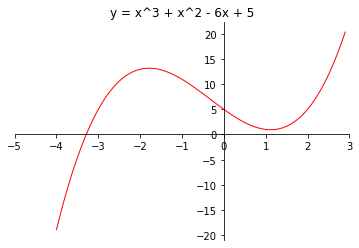

In [ ]:
# Définition de la fonction
def f(x):
    y = x**3 + x**2 -6*x + 5
    return y
    
import numpy as np
# Représentation graphique
xx = np.arange(-4,3,0.1) # liste numpy de -4 à 3 avec un pas de 0.1 (les listes natives avec range sont des listes d'entiers)
yy = []

for x in xx :
    yy.append(f(x))
    
p1 = plt.plot(xx,yy,'r',linewidth=1)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.xlim(-5,3)
plt.title('y = x^3 + x^2 - 6x + 5')
plt.show()

Nous allons chercher une valeur approchée du zéro qui, apparamment, est compris entre -4 et -3.

In [ ]:
# précision souhaitée
nb_decimales = 5
epsilon = 10**(-nb_decimales)

#intervalle d'étude [1 ; 3]
a = -4
b = -3


### 1. Par balayage###


Le principe est simple : on part de la borne gauche, -4 , où la fonction prend des valeurs négatives, et on avance pas à pas, avec un pas égal à la précision '*epsilon*' recherchée, jusqu'à ce que la fonction prenne sa première valeur positive, lieu de la valeur approchée par excès de la racine cherchée, à *epsilon* près. 

In [ ]:
u = a
compteur = 0
while f(u) < 0:
    compteur = compteur + 1
    u = u + epsilon
    
print('La valeur approchée par excès à ',epsilon,'près est : ',round(u,nb_decimales),'   après ',compteur,' itérations.')

NameError: ignored

Pour une précision attendue de 1/100 000<sup>ème</sup>, le nombre de coups nécessaires par balayage est de l'ordre de 100 000, alors que par dichotomie, il n'est que de 17, soit log<sub>2</sub> (100 000)

### 2. Par dichotomie###




In [ ]:
compteur = 0
u = a
v = b
while v-u > epsilon :
    compteur = compteur + 1
    c = (u+v)/2
    if f(u)*f(c) < 0 :
        v = c
    else :
        u = c
        
print('Une valeur approchée à ',epsilon,'près est : ',round(c,nb_decimales),'   après ',compteur,' itérations.')

NameError: ignored

**PARTIE III : Tris**

1. **Tris déjà connus**

On partira d'une liste de N entiers entre 1 et N, classés aléatoirement.
Réécrire les algorithmes de :

* tri par sélection
* tri par insertion
* **Défi 3 : pour les bons en algo** tri bulle 

(voir animation ici : http://lwh.free.fr/pages/algo/tri/tri_bulle.html, décrire l'algorithme et le traduire en Python, avant d'aller étudier le code et proposer une batterie de tests pertinente)
* "*BogoSort*"... Quoi, vous ne connaissez pas ? Facile : vous effectuer un classement au hasard des N nombres, si ce n'est pas bon, vous recommencez... (conseil : ne pas prendre un N trop grand... 12 est déjà beaucoup...)

Effectuer les relevés et graphiques nécessaires, avec courbes de tendance. Commenter.


---






2. **Tri fusion**

Étudier le contenu de la page suivante : http://lwh.free.fr/pages/algo/tri/tri_fusion.html 

ou celle-ci :

In [ ]:
%%html
<iframe src="https://pixees.fr/informatiquelycee/n_site/isn_algo_diviser_pour_regner.html" width="800" height="500"></iframe>

<iframe 
 src="http://lwh.free.fr/pages/algo/tri/tri_fusion.html"
 width="100%" height="500"
 sandbox>
  <p>
    <a href="https://developer.mozilla.org/fr/docs/Web/JavaScript/">
      Un lien à utiliser dans les cas où les navigateurs ne supportent
      pas les <i>iframes</i>.
    </a>
  </p>
</iframe>

Tester le code suivant dans Python Tutor, puis commenter ce code et écrire les "*DocStrings*" des deux fonctions.

In [ ]:
!pip install metakernel

from metakernel import register_ipython_magics
register_ipython_magics()

In [ ]:
%%tutor # lancement de PythonTutor

def fusion(gauche,droite):
    ''' reçoit deux listes et renvoie la liste fusionnée par intercalation'''

    resultat = []
    index_gauche, index_droite = 0, 0
    while index_gauche < len(gauche) and index_droite < len(droite):   
        # Tant que la liste de gauche n'a pas été recopiée, on la recopie terme après terme.     
        if gauche[index_gauche] <= droite[index_droite]:
            resultat.append(gauche[index_gauche])
            index_gauche += 1
        else:
            resultat.append(droite[index_droite])
            index_droite += 1
    if gauche:
        resultat.extend(gauche[index_gauche:])
    if droite:
        resultat.extend(droite[index_droite:])
    return resultat
 
def tri_fusion(m):
    ''' Fonction récursive recevant une liste, la coupant en deux et renvoyant les deux demi-listes triées'''
    
    if len(m) <= 1:
        return m
    milieu = len(m) // 2
    gauche = m[:milieu]
    droite = m[milieu:]
    gauche = tri_fusion(gauche)
    droite = tri_fusion(droite)
    return list(fusion(gauche, droite))

m =[3,1,4,5,2]
tri_fusion(m)

Version itérative du tri fusion (Merge Sort)

source : https://www.geeksforgeeks.org/iterative-merge-sort/ 

In [ ]:
#Création d'une liste aléatoire des entiers de 1 à N
from random import *

N = 7
L = list(range(1,N+1))
shuffle(L)
L

In [ ]:
# Iterative Merge sort (Bottom Up) 

# Iterative mergesort function to 
# sort arr[0...n-1] 
def mergeSort(a): 
	
	current_size = 1
	
	# Outer loop for traversing Each 
	# sub array of current_size 
	while current_size < len(a) - 1: 
		
		left = 0
		# Inner loop for merge call 
		# in a sub array 
		# Each complete Iteration sorts 
		# the iterating sub array 
		while left < len(a)-1: 
			
			# mid index = left index of 
			# sub array + current sub 
			# array size - 1 
			mid = min((left + current_size - 1),(len(a)-1)) 
			
			# (False result,True result) 
			# [Condition] Can use current_size 
			# if 2 * current_size < len(a)-1 
			# else len(a)-1 
			right = ((2 * current_size + left - 1, 
					len(a) - 1)[2 * current_size 
						+ left - 1 > len(a)-1]) 
							
			# Merge call for each sub array 
			merge(a, left, mid, right) 
			left = left + current_size*2
			
		# Increasing sub array size by 
		# multiple of 2 
		current_size = 2 * current_size 

# Merge Function 
def merge(a, l, m, r): 
	n1 = m - l + 1
	n2 = r - m 
	L = [0] * n1 
	R = [0] * n2 
	for i in range(0, n1): 
		L[i] = a[l + i] 
	for i in range(0, n2): 
		R[i] = a[m + i + 1] 

	i, j, k = 0, 0, l 
	while i < n1 and j < n2: 
		if L[i] > R[j]: 
			a[k] = R[j] 
			j += 1
		else: 
			a[k] = L[i] 
			i += 1
		k += 1

	while i < n1: 
		a[k] = L[i] 
		i += 1
		k += 1

	while j < n2: 
		a[k] = R[j] 
		j += 1
		k += 1


# Driver code 
a = [12, 11, 13, 5, 6, 7] 
print("Given array is ") 
print(a) 

mergeSort(a) 

print("Sorted array is ") 
print(a) 

# Contributed by Madhur Chhangani [RCOEM] 


In [ ]:
L

In [ ]:
mergeSort(L)
print(L)

Le code est certes plus complexe à lire, mais le temps d'exécution est légèrement meilleur, n'ayant pas à gérer la pile de récursivité. Par contre, le coût en place mémoire est bien moindre !


---





3. Expliquer pourquoi le coût du tri fusion ressemble à **N * log<sub>2</sub> (N)**


---





La séparation de la liste en deux demi-listes donne finalement un coût en log<sub>2</sub> (N).
Le parcours de la liste entière répète N fois cette dichotomie, d'où le coût global en N*log<sub>2</sub> (N)


4. Comparer avec la méthode de liste "***sort***" de Python.


---



La méthode de tri "sort" donne approximativement un coût du même ordre de grandeur,légèrement meilleur cependant.

**PARTIE IV : Coûts exhorbitants**

1. **Factorielle**

Pour calculer la "factorielle" d'un nombre entier N, on multiplie tous les entiers de 1 jusqu'à N. On la note "N!".

Écrire une fonction itérative et une fonction récursive calculant la factorielle d'une entier N donné en entrée.

Observer et décrire le déroulement dans Python Tutor.
Tracer le graphique donnant N! en fonction de N.

La version récursive présente-t-elle un gain par rapport à la version itérative ? (en temps ? en place mémoire ?)

Pourquoi vaut-il mieux ne pas dépasser N = 12 ?



---



2. **Concours de rapidité d'exécution**

Le nombre de façons de placer k objets identiques dans N cases numérotées, à raison d'un objet par case au maximum, s'appelle la "**Combinaison de k parmi N**".

On la calcule avec l'une des deux formules suivantes :

$ \binom{N}{k} = \frac{N!}{k!(N - k)!} $
ou $\binom{N}{k} =  \binom{N-1}{k-1} +\binom{N-1}{k}$



*   Calculer, sur papier, de tête, la valeur exacte de $\binom{15}{6}$
*   Écrire un programme qui calcule exactement ce nombre le plus efficacement possible (on mettra un compteur de multiplications)...


---







**Défi 4 : produit matriciel**

Une matrice carrée de taille N est un tableau de NxN nombres.
Pour apprendre à multiplier deux matrices voir ici : https://www.youtube.com/watch?v=PKzibb7GBz4  



<img src="https://user.oc-static.com/files/420001_421000/420021.png" width="300" height="130" />


In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/PKzibb7GBz4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


Écrire un programme qui calcule le produit de deux matrices NxN pour N = 3 puis 8 puis 15 et 30.

(On pourra les faire remplir de nombres entiers aléatoires entre -2 et 3, par exemple)

Prendre pour estimateur du temps le nombre de multiplications.

Quel est le degré de la meilleure courbe de tendance polynomiale ?


---




**COURS ILLUSTRÉ : ordre de grandeur de la "Complexité" d'un programme**

* notation O( )
* Comparaison de différents ordres de grandeur de complexité
* règles de calculs sur les O()
* Exemples de détermination de l'ordre de grandeur de la complexité d'un programme.


---






**EXERCICES**

Reprendre les programmes précédents et déterminer l'ordre de grandeur de leur complexité

**Défi 5 :** valeur exacte en fonction de N de la complexité de quelques-uns d'entre eux.